<a href="https://colab.research.google.com/github/metamatematico/Experimentos-IA/blob/master/Reto_07_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias a utilizar

In [ ]:
from keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Dropout, BatchNormalization, UpSampling2D, LeakyReLU
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam, RMSprop
from keras.losses import binary_crossentropy
from keras.callbacks import ModelCheckpoint 

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import glob

# Generar el modelo de GAN

In [ ]:
# Definir el modelo del variational autoencoder
input_size = (28,28,1)
latent_dim = 100
d_p = 0.3

#Discriminador
x = Input(input_size)
conv1 = Conv2D(64,5,strides=(2,2),padding='same',activation=LeakyReLU(alpha=0.2))(x)
conv1 = Dropout(d_p)(conv1)

conv2 = Conv2D(64,5,strides=(2,2),padding='same',activation=LeakyReLU(alpha=0.2))(conv1)
conv2 = Dropout(d_p)(conv2)

conv3 = Conv2D(128,5,strides=(2,2),padding='same',activation=LeakyReLU(alpha=0.2))(conv2)
conv3 = Dropout(d_p)(conv3)

conv4 = Conv2D(128,5,strides=(1,1),padding='same',activation=LeakyReLU(alpha=0.2))(conv3)
conv4 = Dropout(d_p)(conv4)

f = Flatten()(conv4)
d1 = Dense(1, activation='sigmoid')(f)



#Generador
g_x = Input(shape=(latent_dim))
d = Dense(3136)(g_x)
d = BatchNormalization()(d)
r = Reshape((7,7,64))(d)

dec1 = UpSampling2D(size=(2,2))(r)
dec1 = Conv2D(128,5,strides=(1,1), padding='same', activation=LeakyReLU(alpha=0.2))(dec1)
dec1 = BatchNormalization(momentum=0.8)(dec1)

dec2 = UpSampling2D(size=(2,2))(dec1)
dec2 = Conv2D(64,5,strides=(1,1), padding='same', activation=LeakyReLU(alpha=0.2))(dec2)
dec2 = BatchNormalization(momentum=0.8)(dec2)

dec3 = Conv2D(64,5,strides=(1,1), padding='same', activation=LeakyReLU(alpha=0.2))(dec2)
dec3 = BatchNormalization(momentum=0.8)(dec3)

dec4 = Conv2D(1,5,strides=(1,1), padding='same', activation='tanh')(dec3)

In [ ]:
# Compilar los modelos

opti = Adam(0.0002, 0.5)

# Definir discriminador y generador
discriminador = Model(x, d1, name= 'discriminador')
discriminador.compile(optimizer=opti, loss='binary_crossentropy', metrics=['accuracy'])
discriminador.summary()

generador = Model(g_x, dec4, name='generador')
generador.summary()

# Modelo combinado
discriminador.trainable = False
sal_dis = discriminador(generador(g_x))
modelo_t = Model(g_x, sal_dis)
modelo_t.compile(optimizer=opti, loss='binary_crossentropy', metrics=['accuracy'])
modelo_t.summary()  # Observar todo el modelo

Model: "discriminador"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          102464    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         204928    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)       

11493376/11490434 [==============================] - 0s 0us/step
Epoca:  0   D_loss:  0.72   G_loss:  0.698   D_loss_real:  0.747


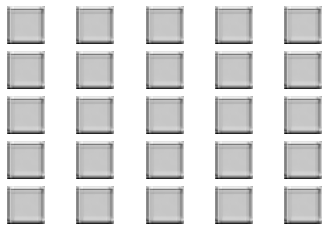

Epoca:  1   D_loss:  0.676   G_loss:  0.663   D_loss_real:  0.66
Epoca:  2   D_loss:  0.646   G_loss:  0.612   D_loss_real:  0.587
Epoca:  3   D_loss:  0.651   G_loss:  0.552   D_loss_real:  0.523
Epoca:  4   D_loss:  0.689   G_loss:  0.484   D_loss_real:  0.507
Epoca:  5   D_loss:  0.642   G_loss:  0.358   D_loss_real:  0.486
Epoca:  6   D_loss:  0.581   G_loss:  0.17   D_loss_real:  0.431
Epoca:  7   D_loss:  0.496   G_loss:  0.067   D_loss_real:  0.327
Epoca:  8   D_loss:  0.378   G_loss:  0.013   D_loss_real:  0.201
Epoca:  9   D_loss:  0.25   G_loss:  0.016   D_loss_real:  0.136
Epoca:  10   D_loss:  0.116   G_loss:  0.008   D_loss_real:  0.077
Epoca:  11   D_loss:  0.04   G_loss:  0.015   D_loss_real:  0.028
Epoca:  12   D_loss:  0.017   G_loss:  0.003   D_loss_real:  0.011
Epoca:  13   D_loss:  0.014   G_loss:  0.015   D_loss_real:  0.013
Epoca:  14   D_loss:  0.084   G_loss:  0.004   D_loss_real:  0.082
Epoca:  15   D_loss:  1.493   G_loss:  0.021   D_loss_real:  1.016
Epoca:  

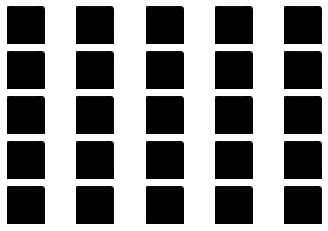

Epoca:  101   D_loss:  0.029   G_loss:  0.023   D_loss_real:  0.055
Epoca:  102   D_loss:  0.017   G_loss:  0.013   D_loss_real:  0.032
Epoca:  103   D_loss:  0.013   G_loss:  0.021   D_loss_real:  0.023
Epoca:  104   D_loss:  0.019   G_loss:  0.005   D_loss_real:  0.032
Epoca:  105   D_loss:  0.036   G_loss:  0.007   D_loss_real:  0.029
Epoca:  106   D_loss:  0.033   G_loss:  0.008   D_loss_real:  0.027
Epoca:  107   D_loss:  0.037   G_loss:  0.016   D_loss_real:  0.016
Epoca:  108   D_loss:  0.859   G_loss:  0.025   D_loss_real:  0.221
Epoca:  109   D_loss:  0.899   G_loss:  0.151   D_loss_real:  0.449
Epoca:  110   D_loss:  0.124   G_loss:  0.096   D_loss_real:  0.24
Epoca:  111   D_loss:  0.092   G_loss:  0.064   D_loss_real:  0.181
Epoca:  112   D_loss:  0.06   G_loss:  0.045   D_loss_real:  0.116
Epoca:  113   D_loss:  0.048   G_loss:  0.021   D_loss_real:  0.085
Epoca:  114   D_loss:  0.043   G_loss:  0.013   D_loss_real:  0.084
Epoca:  115   D_loss:  0.034   G_loss:  0.01   D_l

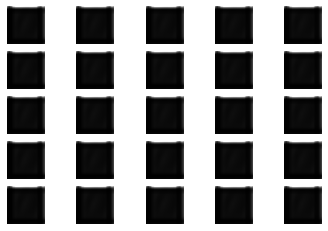

Epoca:  201   D_loss:  0.488   G_loss:  0.292   D_loss_real:  0.472
Epoca:  202   D_loss:  0.372   G_loss:  0.258   D_loss_real:  0.294
Epoca:  203   D_loss:  0.507   G_loss:  0.217   D_loss_real:  0.427
Epoca:  204   D_loss:  0.545   G_loss:  0.241   D_loss_real:  0.468
Epoca:  205   D_loss:  0.526   G_loss:  0.263   D_loss_real:  0.363
Epoca:  206   D_loss:  0.488   G_loss:  0.263   D_loss_real:  0.35
Epoca:  207   D_loss:  0.58   G_loss:  0.298   D_loss_real:  0.576
Epoca:  208   D_loss:  0.484   G_loss:  0.246   D_loss_real:  0.431
Epoca:  209   D_loss:  0.53   G_loss:  0.274   D_loss_real:  0.445
Epoca:  210   D_loss:  0.599   G_loss:  0.294   D_loss_real:  0.493
Epoca:  211   D_loss:  0.493   G_loss:  0.271   D_loss_real:  0.459
Epoca:  212   D_loss:  0.477   G_loss:  0.261   D_loss_real:  0.499
Epoca:  213   D_loss:  0.401   G_loss:  0.224   D_loss_real:  0.365
Epoca:  214   D_loss:  0.498   G_loss:  0.21   D_loss_real:  0.471
Epoca:  215   D_loss:  0.5   G_loss:  0.235   D_loss

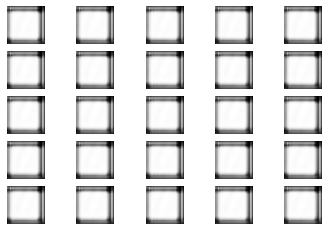

Epoca:  301   D_loss:  0.677   G_loss:  0.727   D_loss_real:  0.651
Epoca:  302   D_loss:  0.682   G_loss:  0.723   D_loss_real:  0.66
Epoca:  303   D_loss:  0.675   G_loss:  0.711   D_loss_real:  0.645
Epoca:  304   D_loss:  0.681   G_loss:  0.712   D_loss_real:  0.63
Epoca:  305   D_loss:  0.68   G_loss:  0.696   D_loss_real:  0.639
Epoca:  306   D_loss:  0.688   G_loss:  0.684   D_loss_real:  0.636
Epoca:  307   D_loss:  0.675   G_loss:  0.685   D_loss_real:  0.617
Epoca:  308   D_loss:  0.693   G_loss:  0.68   D_loss_real:  0.641
Epoca:  309   D_loss:  0.682   G_loss:  0.681   D_loss_real:  0.631
Epoca:  310   D_loss:  0.686   G_loss:  0.684   D_loss_real:  0.629
Epoca:  311   D_loss:  0.675   G_loss:  0.696   D_loss_real:  0.619
Epoca:  312   D_loss:  0.685   G_loss:  0.708   D_loss_real:  0.647
Epoca:  313   D_loss:  0.684   G_loss:  0.681   D_loss_real:  0.647
Epoca:  314   D_loss:  0.675   G_loss:  0.674   D_loss_real:  0.63
Epoca:  315   D_loss:  0.679   G_loss:  0.682   D_los

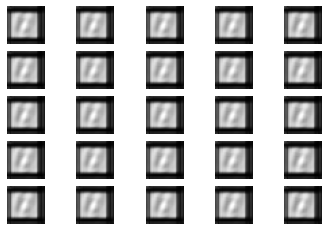

Epoca:  401   D_loss:  0.689   G_loss:  0.684   D_loss_real:  0.671
Epoca:  402   D_loss:  0.682   G_loss:  0.702   D_loss_real:  0.661
Epoca:  403   D_loss:  0.681   G_loss:  0.707   D_loss_real:  0.673
Epoca:  404   D_loss:  0.685   G_loss:  0.698   D_loss_real:  0.666
Epoca:  405   D_loss:  0.693   G_loss:  0.704   D_loss_real:  0.683
Epoca:  406   D_loss:  0.693   G_loss:  0.703   D_loss_real:  0.673
Epoca:  407   D_loss:  0.682   G_loss:  0.699   D_loss_real:  0.668
Epoca:  408   D_loss:  0.689   G_loss:  0.702   D_loss_real:  0.668
Epoca:  409   D_loss:  0.686   G_loss:  0.688   D_loss_real:  0.657
Epoca:  410   D_loss:  0.681   G_loss:  0.695   D_loss_real:  0.651
Epoca:  411   D_loss:  0.69   G_loss:  0.697   D_loss_real:  0.659
Epoca:  412   D_loss:  0.694   G_loss:  0.691   D_loss_real:  0.668
Epoca:  413   D_loss:  0.684   G_loss:  0.709   D_loss_real:  0.663
Epoca:  414   D_loss:  0.672   G_loss:  0.702   D_loss_real:  0.661
Epoca:  415   D_loss:  0.691   G_loss:  0.706   D

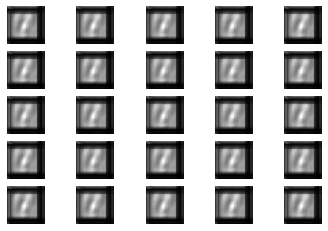

Epoca:  501   D_loss:  0.693   G_loss:  0.697   D_loss_real:  0.672
Epoca:  502   D_loss:  0.687   G_loss:  0.698   D_loss_real:  0.672
Epoca:  503   D_loss:  0.684   G_loss:  0.685   D_loss_real:  0.676
Epoca:  504   D_loss:  0.678   G_loss:  0.673   D_loss_real:  0.651
Epoca:  505   D_loss:  0.684   G_loss:  0.685   D_loss_real:  0.658
Epoca:  506   D_loss:  0.687   G_loss:  0.686   D_loss_real:  0.676
Epoca:  507   D_loss:  0.699   G_loss:  0.677   D_loss_real:  0.677
Epoca:  508   D_loss:  0.691   G_loss:  0.676   D_loss_real:  0.662
Epoca:  509   D_loss:  0.683   G_loss:  0.676   D_loss_real:  0.648
Epoca:  510   D_loss:  0.682   G_loss:  0.67   D_loss_real:  0.64
Epoca:  511   D_loss:  0.682   G_loss:  0.679   D_loss_real:  0.653
Epoca:  512   D_loss:  0.682   G_loss:  0.678   D_loss_real:  0.651
Epoca:  513   D_loss:  0.691   G_loss:  0.673   D_loss_real:  0.673
Epoca:  514   D_loss:  0.69   G_loss:  0.678   D_loss_real:  0.673
Epoca:  515   D_loss:  0.687   G_loss:  0.665   D_l

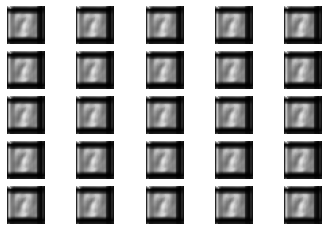

Epoca:  601   D_loss:  0.696   G_loss:  0.699   D_loss_real:  0.684
Epoca:  602   D_loss:  0.68   G_loss:  0.691   D_loss_real:  0.665
Epoca:  603   D_loss:  0.688   G_loss:  0.682   D_loss_real:  0.681
Epoca:  604   D_loss:  0.687   G_loss:  0.681   D_loss_real:  0.662
Epoca:  605   D_loss:  0.685   G_loss:  0.689   D_loss_real:  0.663
Epoca:  606   D_loss:  0.688   G_loss:  0.667   D_loss_real:  0.674
Epoca:  607   D_loss:  0.692   G_loss:  0.676   D_loss_real:  0.664
Epoca:  608   D_loss:  0.693   G_loss:  0.683   D_loss_real:  0.666
Epoca:  609   D_loss:  0.686   G_loss:  0.679   D_loss_real:  0.66
Epoca:  610   D_loss:  0.683   G_loss:  0.683   D_loss_real:  0.663
Epoca:  611   D_loss:  0.694   G_loss:  0.689   D_loss_real:  0.67
Epoca:  612   D_loss:  0.683   G_loss:  0.693   D_loss_real:  0.661
Epoca:  613   D_loss:  0.692   G_loss:  0.685   D_loss_real:  0.682
Epoca:  614   D_loss:  0.691   G_loss:  0.693   D_loss_real:  0.675
Epoca:  615   D_loss:  0.696   G_loss:  0.696   D_l

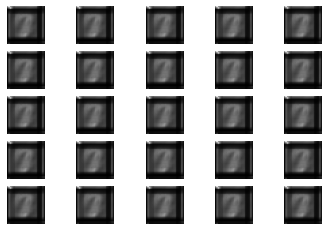

Epoca:  701   D_loss:  0.687   G_loss:  0.686   D_loss_real:  0.672
Epoca:  702   D_loss:  0.691   G_loss:  0.682   D_loss_real:  0.668
Epoca:  703   D_loss:  0.683   G_loss:  0.692   D_loss_real:  0.665
Epoca:  704   D_loss:  0.691   G_loss:  0.684   D_loss_real:  0.674
Epoca:  705   D_loss:  0.684   G_loss:  0.69   D_loss_real:  0.667
Epoca:  706   D_loss:  0.69   G_loss:  0.682   D_loss_real:  0.679
Epoca:  707   D_loss:  0.694   G_loss:  0.678   D_loss_real:  0.671
Epoca:  708   D_loss:  0.688   G_loss:  0.692   D_loss_real:  0.67
Epoca:  709   D_loss:  0.681   G_loss:  0.699   D_loss_real:  0.664
Epoca:  710   D_loss:  0.671   G_loss:  0.734   D_loss_real:  0.662
Epoca:  711   D_loss:  0.66   G_loss:  0.715   D_loss_real:  0.654
Epoca:  712   D_loss:  0.692   G_loss:  0.702   D_loss_real:  0.667
Epoca:  713   D_loss:  0.71   G_loss:  0.674   D_loss_real:  0.663
Epoca:  714   D_loss:  0.67   G_loss:  0.722   D_loss_real:  0.656
Epoca:  715   D_loss:  0.672   G_loss:  0.7   D_loss_r

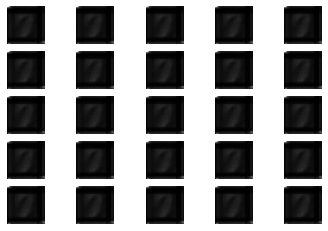

Epoca:  801   D_loss:  0.7   G_loss:  0.671   D_loss_real:  0.668
Epoca:  802   D_loss:  0.72   G_loss:  0.704   D_loss_real:  0.672
Epoca:  803   D_loss:  0.686   G_loss:  0.749   D_loss_real:  0.655
Epoca:  804   D_loss:  0.665   G_loss:  0.793   D_loss_real:  0.679
Epoca:  805   D_loss:  0.662   G_loss:  0.752   D_loss_real:  0.655
Epoca:  806   D_loss:  0.688   G_loss:  0.702   D_loss_real:  0.654
Epoca:  807   D_loss:  0.706   G_loss:  0.708   D_loss_real:  0.671
Epoca:  808   D_loss:  0.707   G_loss:  0.712   D_loss_real:  0.687
Epoca:  809   D_loss:  0.689   G_loss:  0.714   D_loss_real:  0.685
Epoca:  810   D_loss:  0.682   G_loss:  0.713   D_loss_real:  0.678
Epoca:  811   D_loss:  0.677   G_loss:  0.713   D_loss_real:  0.673
Epoca:  812   D_loss:  0.681   G_loss:  0.698   D_loss_real:  0.672
Epoca:  813   D_loss:  0.693   G_loss:  0.682   D_loss_real:  0.669
Epoca:  814   D_loss:  0.699   G_loss:  0.695   D_loss_real:  0.681
Epoca:  815   D_loss:  0.689   G_loss:  0.695   D_l

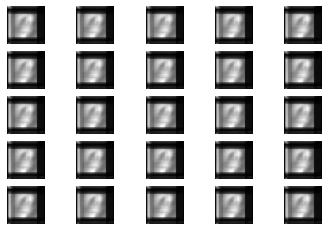

Epoca:  901   D_loss:  0.679   G_loss:  0.675   D_loss_real:  0.661
Epoca:  902   D_loss:  0.691   G_loss:  0.678   D_loss_real:  0.67
Epoca:  903   D_loss:  0.686   G_loss:  0.693   D_loss_real:  0.667
Epoca:  904   D_loss:  0.688   G_loss:  0.684   D_loss_real:  0.664
Epoca:  905   D_loss:  0.687   G_loss:  0.688   D_loss_real:  0.675
Epoca:  906   D_loss:  0.684   G_loss:  0.704   D_loss_real:  0.667
Epoca:  907   D_loss:  0.691   G_loss:  0.7   D_loss_real:  0.677
Epoca:  908   D_loss:  0.686   G_loss:  0.697   D_loss_real:  0.679
Epoca:  909   D_loss:  0.69   G_loss:  0.692   D_loss_real:  0.686
Epoca:  910   D_loss:  0.69   G_loss:  0.699   D_loss_real:  0.681
Epoca:  911   D_loss:  0.69   G_loss:  0.693   D_loss_real:  0.683
Epoca:  912   D_loss:  0.69   G_loss:  0.697   D_loss_real:  0.67
Epoca:  913   D_loss:  0.671   G_loss:  0.696   D_loss_real:  0.66
Epoca:  914   D_loss:  0.674   G_loss:  0.703   D_loss_real:  0.653
Epoca:  915   D_loss:  0.683   G_loss:  0.684   D_loss_re

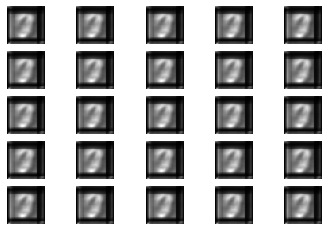

Epoca:  1001   D_loss:  0.68   G_loss:  0.705   D_loss_real:  0.66
Epoca:  1002   D_loss:  0.697   G_loss:  0.69   D_loss_real:  0.682
Epoca:  1003   D_loss:  0.687   G_loss:  0.684   D_loss_real:  0.67
Epoca:  1004   D_loss:  0.687   G_loss:  0.689   D_loss_real:  0.668
Epoca:  1005   D_loss:  0.697   G_loss:  0.678   D_loss_real:  0.686
Epoca:  1006   D_loss:  0.688   G_loss:  0.697   D_loss_real:  0.669
Epoca:  1007   D_loss:  0.681   G_loss:  0.676   D_loss_real:  0.662
Epoca:  1008   D_loss:  0.69   G_loss:  0.686   D_loss_real:  0.668
Epoca:  1009   D_loss:  0.678   G_loss:  0.691   D_loss_real:  0.668
Epoca:  1010   D_loss:  0.683   G_loss:  0.671   D_loss_real:  0.655
Epoca:  1011   D_loss:  0.685   G_loss:  0.688   D_loss_real:  0.666
Epoca:  1012   D_loss:  0.684   G_loss:  0.68   D_loss_real:  0.669
Epoca:  1013   D_loss:  0.681   G_loss:  0.687   D_loss_real:  0.666
Epoca:  1014   D_loss:  0.685   G_loss:  0.7   D_loss_real:  0.671
Epoca:  1015   D_loss:  0.687   G_loss:  0

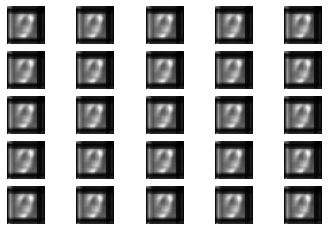

Epoca:  1101   D_loss:  0.688   G_loss:  0.705   D_loss_real:  0.666
Epoca:  1102   D_loss:  0.676   G_loss:  0.696   D_loss_real:  0.639
Epoca:  1103   D_loss:  0.695   G_loss:  0.708   D_loss_real:  0.666
Epoca:  1104   D_loss:  0.685   G_loss:  0.707   D_loss_real:  0.678
Epoca:  1105   D_loss:  0.679   G_loss:  0.732   D_loss_real:  0.676
Epoca:  1106   D_loss:  0.676   G_loss:  0.702   D_loss_real:  0.663
Epoca:  1107   D_loss:  0.686   G_loss:  0.72   D_loss_real:  0.672
Epoca:  1108   D_loss:  0.693   G_loss:  0.705   D_loss_real:  0.677
Epoca:  1109   D_loss:  0.686   G_loss:  0.73   D_loss_real:  0.677
Epoca:  1110   D_loss:  0.683   G_loss:  0.713   D_loss_real:  0.683
Epoca:  1111   D_loss:  0.683   G_loss:  0.699   D_loss_real:  0.672
Epoca:  1112   D_loss:  0.685   G_loss:  0.7   D_loss_real:  0.677
Epoca:  1113   D_loss:  0.675   G_loss:  0.711   D_loss_real:  0.673
Epoca:  1114   D_loss:  0.683   G_loss:  0.696   D_loss_real:  0.676
Epoca:  1115   D_loss:  0.7   G_loss: 

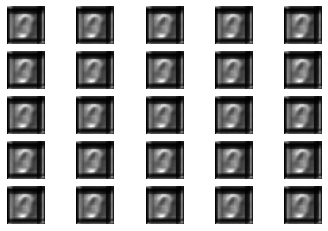

Epoca:  1201   D_loss:  0.674   G_loss:  0.719   D_loss_real:  0.681
Epoca:  1202   D_loss:  0.696   G_loss:  0.697   D_loss_real:  0.685
Epoca:  1203   D_loss:  0.68   G_loss:  0.713   D_loss_real:  0.668
Epoca:  1204   D_loss:  0.671   G_loss:  0.708   D_loss_real:  0.662
Epoca:  1205   D_loss:  0.679   G_loss:  0.696   D_loss_real:  0.659
Epoca:  1206   D_loss:  0.669   G_loss:  0.697   D_loss_real:  0.658
Epoca:  1207   D_loss:  0.677   G_loss:  0.71   D_loss_real:  0.672
Epoca:  1208   D_loss:  0.679   G_loss:  0.701   D_loss_real:  0.667
Epoca:  1209   D_loss:  0.684   G_loss:  0.703   D_loss_real:  0.67
Epoca:  1210   D_loss:  0.691   G_loss:  0.711   D_loss_real:  0.671
Epoca:  1211   D_loss:  0.692   G_loss:  0.712   D_loss_real:  0.688
Epoca:  1212   D_loss:  0.675   G_loss:  0.697   D_loss_real:  0.669
Epoca:  1213   D_loss:  0.677   G_loss:  0.695   D_loss_real:  0.665
Epoca:  1214   D_loss:  0.678   G_loss:  0.703   D_loss_real:  0.655
Epoca:  1215   D_loss:  0.689   G_los

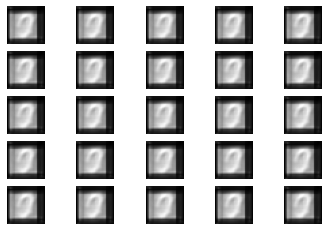

Epoca:  1301   D_loss:  0.663   G_loss:  0.766   D_loss_real:  0.674
Epoca:  1302   D_loss:  0.664   G_loss:  0.754   D_loss_real:  0.668
Epoca:  1303   D_loss:  0.665   G_loss:  0.691   D_loss_real:  0.664
Epoca:  1304   D_loss:  0.679   G_loss:  0.71   D_loss_real:  0.667
Epoca:  1305   D_loss:  0.676   G_loss:  0.713   D_loss_real:  0.65
Epoca:  1306   D_loss:  0.691   G_loss:  0.749   D_loss_real:  0.686
Epoca:  1307   D_loss:  0.682   G_loss:  0.765   D_loss_real:  0.686
Epoca:  1308   D_loss:  0.662   G_loss:  0.735   D_loss_real:  0.678
Epoca:  1309   D_loss:  0.684   G_loss:  0.705   D_loss_real:  0.676
Epoca:  1310   D_loss:  0.711   G_loss:  0.731   D_loss_real:  0.687
Epoca:  1311   D_loss:  0.66   G_loss:  0.743   D_loss_real:  0.642
Epoca:  1312   D_loss:  0.68   G_loss:  0.744   D_loss_real:  0.69
Epoca:  1313   D_loss:  0.673   G_loss:  0.719   D_loss_real:  0.655
Epoca:  1314   D_loss:  0.683   G_loss:  0.729   D_loss_real:  0.681
Epoca:  1315   D_loss:  0.679   G_loss:

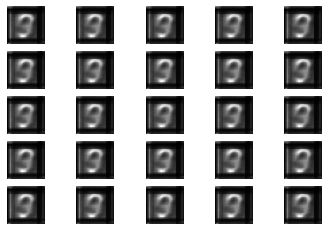

Epoca:  1401   D_loss:  0.674   G_loss:  0.744   D_loss_real:  0.656
Epoca:  1402   D_loss:  0.68   G_loss:  0.73   D_loss_real:  0.659
Epoca:  1403   D_loss:  0.703   G_loss:  0.714   D_loss_real:  0.679
Epoca:  1404   D_loss:  0.669   G_loss:  0.726   D_loss_real:  0.646
Epoca:  1405   D_loss:  0.674   G_loss:  0.74   D_loss_real:  0.675
Epoca:  1406   D_loss:  0.686   G_loss:  0.714   D_loss_real:  0.682
Epoca:  1407   D_loss:  0.671   G_loss:  0.718   D_loss_real:  0.651
Epoca:  1408   D_loss:  0.683   G_loss:  0.721   D_loss_real:  0.676
Epoca:  1409   D_loss:  0.667   G_loss:  0.714   D_loss_real:  0.665
Epoca:  1410   D_loss:  0.672   G_loss:  0.72   D_loss_real:  0.656
Epoca:  1411   D_loss:  0.677   G_loss:  0.716   D_loss_real:  0.651
Epoca:  1412   D_loss:  0.679   G_loss:  0.732   D_loss_real:  0.674
Epoca:  1413   D_loss:  0.685   G_loss:  0.742   D_loss_real:  0.683
Epoca:  1414   D_loss:  0.679   G_loss:  0.76   D_loss_real:  0.669
Epoca:  1415   D_loss:  0.675   G_loss:

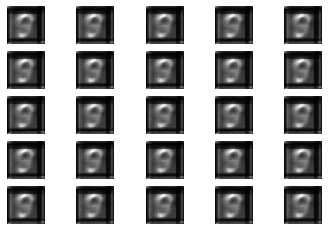

Epoca:  1501   D_loss:  0.683   G_loss:  0.727   D_loss_real:  0.672
Epoca:  1502   D_loss:  0.655   G_loss:  0.74   D_loss_real:  0.652
Epoca:  1503   D_loss:  0.673   G_loss:  0.724   D_loss_real:  0.654
Epoca:  1504   D_loss:  0.675   G_loss:  0.713   D_loss_real:  0.65
Epoca:  1505   D_loss:  0.671   G_loss:  0.719   D_loss_real:  0.66
Epoca:  1506   D_loss:  0.67   G_loss:  0.726   D_loss_real:  0.658
Epoca:  1507   D_loss:  0.67   G_loss:  0.729   D_loss_real:  0.655
Epoca:  1508   D_loss:  0.68   G_loss:  0.728   D_loss_real:  0.661
Epoca:  1509   D_loss:  0.667   G_loss:  0.705   D_loss_real:  0.657
Epoca:  1510   D_loss:  0.678   G_loss:  0.719   D_loss_real:  0.646
Epoca:  1511   D_loss:  0.667   G_loss:  0.75   D_loss_real:  0.652
Epoca:  1512   D_loss:  0.665   G_loss:  0.739   D_loss_real:  0.662
Epoca:  1513   D_loss:  0.658   G_loss:  0.721   D_loss_real:  0.64
Epoca:  1514   D_loss:  0.671   G_loss:  0.727   D_loss_real:  0.651
Epoca:  1515   D_loss:  0.693   G_loss:  0

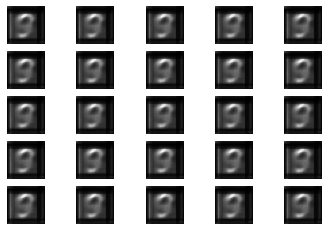

Epoca:  1601   D_loss:  0.672   G_loss:  0.733   D_loss_real:  0.657
Epoca:  1602   D_loss:  0.675   G_loss:  0.711   D_loss_real:  0.666
Epoca:  1603   D_loss:  0.676   G_loss:  0.701   D_loss_real:  0.661
Epoca:  1604   D_loss:  0.672   G_loss:  0.735   D_loss_real:  0.668
Epoca:  1605   D_loss:  0.681   G_loss:  0.729   D_loss_real:  0.68
Epoca:  1606   D_loss:  0.67   G_loss:  0.718   D_loss_real:  0.659
Epoca:  1607   D_loss:  0.683   G_loss:  0.731   D_loss_real:  0.67
Epoca:  1608   D_loss:  0.658   G_loss:  0.715   D_loss_real:  0.632
Epoca:  1609   D_loss:  0.687   G_loss:  0.734   D_loss_real:  0.68
Epoca:  1610   D_loss:  0.698   G_loss:  0.753   D_loss_real:  0.673
Epoca:  1611   D_loss:  0.677   G_loss:  0.749   D_loss_real:  0.655
Epoca:  1612   D_loss:  0.666   G_loss:  0.759   D_loss_real:  0.673
Epoca:  1613   D_loss:  0.659   G_loss:  0.79   D_loss_real:  0.661
Epoca:  1614   D_loss:  0.646   G_loss:  0.791   D_loss_real:  0.649
Epoca:  1615   D_loss:  0.656   G_loss:

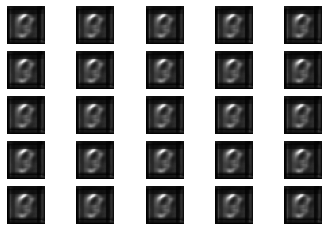

Epoca:  1701   D_loss:  0.677   G_loss:  0.775   D_loss_real:  0.673
Epoca:  1702   D_loss:  0.669   G_loss:  0.783   D_loss_real:  0.646
Epoca:  1703   D_loss:  0.663   G_loss:  0.798   D_loss_real:  0.644
Epoca:  1704   D_loss:  0.659   G_loss:  0.771   D_loss_real:  0.683
Epoca:  1705   D_loss:  0.666   G_loss:  0.791   D_loss_real:  0.696
Epoca:  1706   D_loss:  0.683   G_loss:  0.79   D_loss_real:  0.68
Epoca:  1707   D_loss:  0.666   G_loss:  0.777   D_loss_real:  0.666
Epoca:  1708   D_loss:  0.674   G_loss:  0.74   D_loss_real:  0.689
Epoca:  1709   D_loss:  0.682   G_loss:  0.736   D_loss_real:  0.667
Epoca:  1710   D_loss:  0.694   G_loss:  0.765   D_loss_real:  0.694
Epoca:  1711   D_loss:  0.67   G_loss:  0.75   D_loss_real:  0.658
Epoca:  1712   D_loss:  0.653   G_loss:  0.757   D_loss_real:  0.637
Epoca:  1713   D_loss:  0.686   G_loss:  0.731   D_loss_real:  0.662
Epoca:  1714   D_loss:  0.666   G_loss:  0.762   D_loss_real:  0.664
Epoca:  1715   D_loss:  0.672   G_loss:

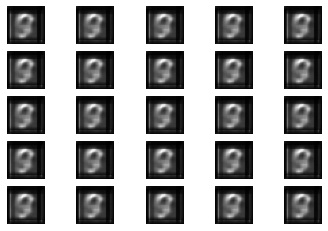

Epoca:  1801   D_loss:  0.674   G_loss:  0.738   D_loss_real:  0.671
Epoca:  1802   D_loss:  0.67   G_loss:  0.732   D_loss_real:  0.662
Epoca:  1803   D_loss:  0.676   G_loss:  0.709   D_loss_real:  0.663
Epoca:  1804   D_loss:  0.673   G_loss:  0.728   D_loss_real:  0.65
Epoca:  1805   D_loss:  0.685   G_loss:  0.724   D_loss_real:  0.68
Epoca:  1806   D_loss:  0.67   G_loss:  0.727   D_loss_real:  0.633
Epoca:  1807   D_loss:  0.683   G_loss:  0.738   D_loss_real:  0.648
Epoca:  1808   D_loss:  0.699   G_loss:  0.747   D_loss_real:  0.689
Epoca:  1809   D_loss:  0.668   G_loss:  0.753   D_loss_real:  0.684
Epoca:  1810   D_loss:  0.661   G_loss:  0.745   D_loss_real:  0.645
Epoca:  1811   D_loss:  0.686   G_loss:  0.748   D_loss_real:  0.697
Epoca:  1812   D_loss:  0.671   G_loss:  0.733   D_loss_real:  0.651
Epoca:  1813   D_loss:  0.688   G_loss:  0.732   D_loss_real:  0.652
Epoca:  1814   D_loss:  0.672   G_loss:  0.729   D_loss_real:  0.645
Epoca:  1815   D_loss:  0.672   G_loss

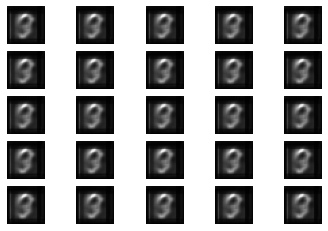

Epoca:  1901   D_loss:  0.675   G_loss:  0.722   D_loss_real:  0.664
Epoca:  1902   D_loss:  0.688   G_loss:  0.727   D_loss_real:  0.663
Epoca:  1903   D_loss:  0.679   G_loss:  0.756   D_loss_real:  0.672
Epoca:  1904   D_loss:  0.671   G_loss:  0.753   D_loss_real:  0.658
Epoca:  1905   D_loss:  0.681   G_loss:  0.736   D_loss_real:  0.655
Epoca:  1906   D_loss:  0.682   G_loss:  0.743   D_loss_real:  0.668
Epoca:  1907   D_loss:  0.683   G_loss:  0.727   D_loss_real:  0.667
Epoca:  1908   D_loss:  0.681   G_loss:  0.749   D_loss_real:  0.679
Epoca:  1909   D_loss:  0.686   G_loss:  0.726   D_loss_real:  0.681
Epoca:  1910   D_loss:  0.678   G_loss:  0.762   D_loss_real:  0.677
Epoca:  1911   D_loss:  0.677   G_loss:  0.746   D_loss_real:  0.675
Epoca:  1912   D_loss:  0.673   G_loss:  0.738   D_loss_real:  0.649
Epoca:  1913   D_loss:  0.667   G_loss:  0.715   D_loss_real:  0.658
Epoca:  1914   D_loss:  0.685   G_loss:  0.726   D_loss_real:  0.677
Epoca:  1915   D_loss:  0.676   G_

In [ ]:
# Se necesita entrenar en dos partes

# Primero el discriminador para que diferencia imagenes reales de ruido

# Con ayuda del discriminador se entrena el generador

from keras.datasets import mnist


def train(epochs, batch_size=128, sample_interval=50):#
        (X_train, ___), (___, ___) = mnist.load_data()
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=-1)
        
        valid = np.ones((batch_size, 1))   # Tomar los valores como reales - unos
        fake = np.zeros((batch_size, 1))   # Tomar los valores como falsos - ceros

        for epoch in range(epochs):
            idx = np.random.randint(0, X_train.shape[0], batch_size) # Escoje numero aleatoriamente
            imgs = X_train[idx]                                      # Toma idx imagenes reales

            noise = np.random.normal(0, 1, (batch_size, latent_dim)) # crea ruidos aleatorios
            
            gen_imgs = generador.predict(noise)                      # Crea objetos falsos

            
            d_loss_fake = discriminador.train_on_batch(gen_imgs, fake) # Observa los objetos falsos
            d_loss_real = discriminador.train_on_batch(imgs, valid)  # Observa los objetos reales
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)            # Junta las dos perdidas del discriminador

            
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            g_loss = modelo_t.train_on_batch(noise, valid)           # Observa la perdida del modelo total

            print ('Epoca: ',epoch, '  D_loss: ', round(d_loss[0],3), '  G_loss: ', round(g_loss[0],3), '  D_loss_real: ', round(d_loss_real[0],3))
            if epoch % sample_interval == 0:
              sample_images(epoch)

def sample_images(epoch):
        r, c = 5, 5
        noise = np.random.randint(0, 1, (r * c, latent_dim)) # distribucion normal
        gen_imgs = generador.predict(noise)
        gen_imgs = 0.5 * gen_imgs + 0.5
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        plt.show()

train(epochs=2000, batch_size=128, sample_interval=100)


In [ ]:
# Probar el modelo terminado utilizando la funcion sample_images

sample_images(200)  # Escribir la funcion